Generate a gene detection plot by FPKM a la Georgi's paper.

In [1]:
import pandas
import numpy
import matplotlib
from matplotlib import pyplot


In [2]:
#matplotlib.style.use('ggplot')

In [3]:
%matplotlib inline

In [4]:
store = pandas.HDFStore('mm9-M1-male_lenti.h5', 'r')
annotation = store[store.keys()[0]]
store.close()

In [5]:
annotation.head()

,chromosome,source,type,start,stop,strand,frame,gene_id,transcript_id,gene_type,...,transcript_type,transcript_status,transcript_name,level,havana_gene,havana_transcript,exon_number,exon_id,tag,ccdsid
0,chr1,HAVANA,gene,3044314,3044814,1,NaN,ENSMUSG00000090025.1,ENSMUSG00000090025.1,pseudogene,...,pseudogene,KNOWN,Gm16088,2.0,OTTMUSG00000030059.1,NaN,NaN,NaN,NaN,NaN
1,chr1,HAVANA,transcript,3044314,3044814,1,NaN,ENSMUSG00000090025.1,ENSMUST00000160944.1,pseudogene,...,transcribed_unprocessed_pseudogene,KNOWN,Gm16088-001,2.0,OTTMUSG00000030059.1,OTTMUST00000074493.1,NaN,NaN,NaN,NaN
2,chr1,HAVANA,exon,3044314,3044814,1,NaN,ENSMUSG00000090025.1,ENSMUST00000160944.1,pseudogene,...,transcribed_unprocessed_pseudogene,KNOWN,Gm16088-001,2.0,OTTMUSG00000030059.1,OTTMUST00000074493.1,1.0,ENSMUSE00000848981.1,NaN,NaN
3,chr1,ENSEMBL,gene,3092097,3092206,1,NaN,ENSMUSG00000064842.1,ENSMUSG00000064842.1,snRNA,...,snRNA,NOVEL,U6,3.0,NaN,NaN,NaN,NaN,NaN,NaN
4,chr1,ENSEMBL,transcript,3092097,3092206,1,NaN,ENSMUSG00000064842.1,ENSMUST00000082908.1,snRNA,...,snRNA,NOVEL,U6.149-201,3.0,NaN,NaN,NaN,NaN,basic,NaN


In [6]:
protein_coding = annotation[(annotation['type'] == 'gene') & (annotation['gene_type'] == 'protein_coding')][['gene_id', 'gene_type']]

In [7]:
cegs = pandas.read_csv('C1_CEGS_10T1-2_LVmyoDmef2C_run1_July12_2016_poolH_FPKM.csv', header=0, index_col=0)

In [8]:
len(cegs)

37410

In [9]:
cegs_protein = cegs.loc[protein_coding['gene_id']]

In [10]:
cegs_protein

,17423_H1,17423_H2,17423_H3,17423_H4,17423_H5,17423_H6,17423_H7,17423_H8,17423_H9,17423_H10,17423_H11,17423_H12
gene_id,,,,,,,,,,,,
ENSMUSG00000051951.5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ENSMUSG00000025900.4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ENSMUSG00000025902.7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ENSMUSG00000033845.7,55.83,86.02,183.15,0.00,0.00,115.47,184.77,106.73,92.15,77.34,115.83,139.66
ENSMUSG00000025903.8,221.37,450.40,214.84,0.00,3.83,363.73,261.91,143.81,172.48,152.52,660.22,369.76
ENSMUSG00000033813.8,69.89,55.27,71.13,0.00,2.41,22.52,57.00,33.74,62.03,86.48,129.59,53.38
ENSMUSG00000062588.3,52.16,26.60,19.30,0.00,0.00,4.48,15.55,11.05,51.94,49.91,34.19,67.62
ENSMUSG00000002459.10,17.25,0.00,16.25,0.00,0.00,16.19,1.26,6.33,0.00,19.73,0.00,0.40
ENSMUSG00000033793.7,67.20,54.47,80.05,0.00,0.00,59.80,49.51,10.25,38.55,34.06,79.74,45.90


In [11]:
cegs_protein.columns

Index(['17423_H1', '17423_H2', '17423_H3', '17423_H4', '17423_H5', '17423_H6',
       '17423_H7', '17423_H8', '17423_H9', '17423_H10', '17423_H11',
       '17423_H12'],
      dtype='object')

In [12]:
def bin_library_quantification(quantification):
    bins = [0.1, 1, 2, 5, 10, 50, 500, 5000, 1e9]
    
    histogram = {}
    for col in quantification:
        histogram[col], _ = numpy.histogram(quantification[col], bins)

    histogram = pandas.DataFrame(
        histogram, 
        columns=cegs_protein.columns,
        index=['{} FPKM'.format(x) for x in bins[:-1]])

    return histogram

In [13]:
bin_library_quantification(cegs_protein)

,17423_H1,17423_H2,17423_H3,17423_H4,17423_H5,17423_H6,17423_H7,17423_H8,17423_H9,17423_H10,17423_H11,17423_H12
0.1 FPKM,1374,901,1054,128,366,966,726,711,821,986,1108,1358
1 FPKM,827,530,681,197,193,780,455,368,579,734,695,822
2 FPKM,1362,1027,1215,242,244,1332,861,603,1167,1199,1344,1388
5 FPKM,1271,1035,1102,146,93,1189,915,603,1112,1111,1158,1260
10 FPKM,2673,2628,2688,161,131,2500,2537,2146,2817,2615,2533,2721
50 FPKM,1710,1895,1934,195,94,1650,1988,2088,1856,1757,1816,1736
500 FPKM,221,229,230,129,21,207,231,230,184,212,201,208
5000 FPKM,9,6,10,13,13,11,7,10,8,8,8,9


In [55]:
def fpkm_detection(quantification, style='ggplot', cm=pyplot.cm.OrRd_r):
    histogram = bin_library_quantification(quantification)
    
    with pyplot.style.context(style):
        f = pyplot.figure(figsize=(8,6))
        ax = f.add_subplot(1,1,1)
        ax.set_ylabel('Number of genes')
        by_genes = histogram.reindex(histogram.index[::-1]).T

        by_genes.plot.bar(
            stacked=True, 
            cmap=cm,
            ax=ax)
        
        for rect, total in zip(ax.patches, list(by_genes.sum(axis=1))):
            height = rect.get_height()
            x = rect.get_x() + rect.get_width()/2
            y = total + 5

            label = str(total)
            ax.text(x, y, label, ha='center', va='bottom')
        
        ax.legend(bbox_to_anchor=(1.05, 1), 
                  loc=2, 
                  borderaxespad=0.0)
        return f

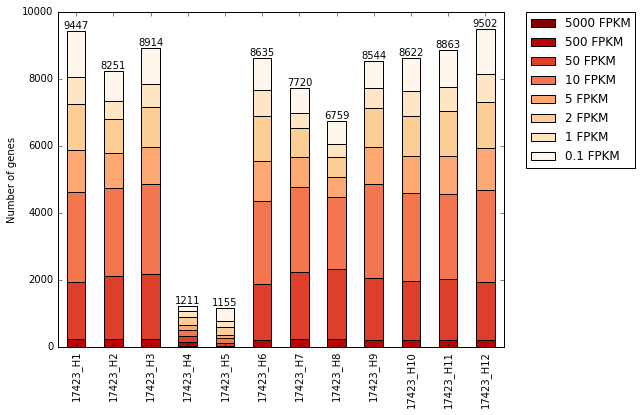

In [56]:
f = fpkm_detection(cegs_protein, 'seaborn-dark-palette')
#f.savefig('/dev/shm/plot.png', bbox_inches='tight')


9.0 -0.25 0.0 5000 Rectangle(-0.25,0;0.5x9)
6.0 0.75 1.0 5000 Rectangle(0.75,0;0.5x6)
10.0 1.75 2.0 5000 Rectangle(1.75,0;0.5x10)
13.0 2.75 3.0 5000 Rectangle(2.75,0;0.5x13)
13.0 3.75 4.0 5000 Rectangle(3.75,0;0.5x13)
11.0 4.75 5.0 5000 Rectangle(4.75,0;0.5x11)
7.0 5.75 6.0 5000 Rectangle(5.75,0;0.5x7)
10.0 6.75 7.0 5000 Rectangle(6.75,0;0.5x10)
8.0 7.75 8.0 5000 Rectangle(7.75,0;0.5x8)
8.0 8.75 9.0 5000 Rectangle(8.75,0;0.5x8)
8.0 9.75 10.0 5000 Rectangle(9.75,0;0.5x8)
9.0 10.75 11.0 5000 Rectangle(10.75,0;0.5x9)


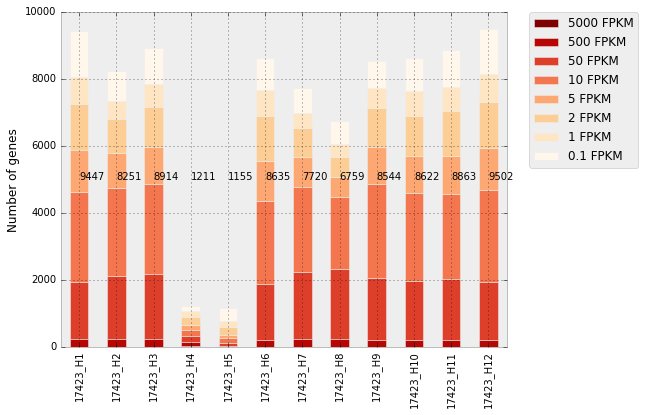

In [50]:
f = fpkm_detection(cegs_protein, 'bmh')

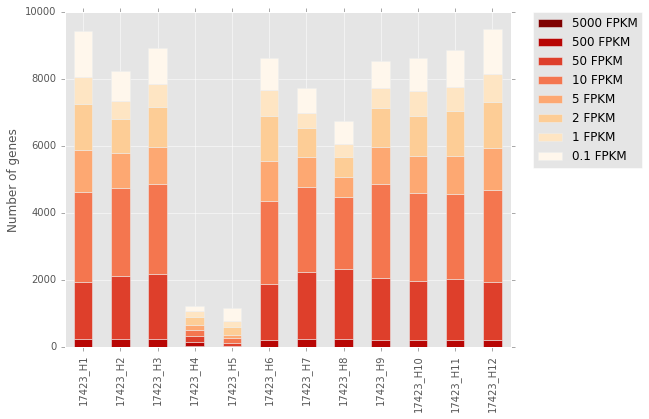

In [17]:
f = fpkm_detection(cegs_protein, 'ggplot')

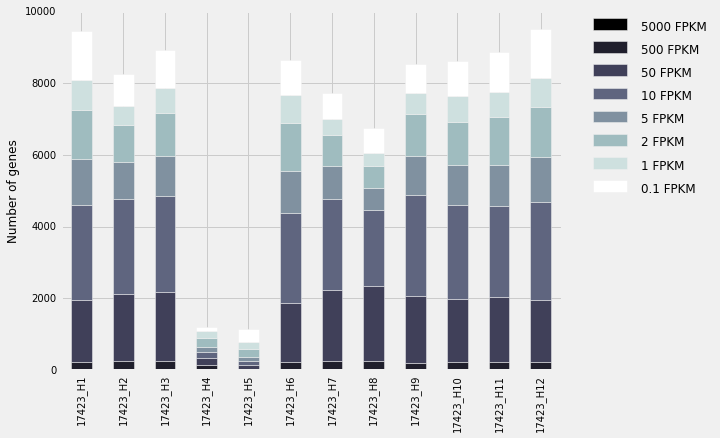

In [18]:
f = fpkm_detection(cegs_protein, 'fivethirtyeight', cm =pyplot.cm.bone)

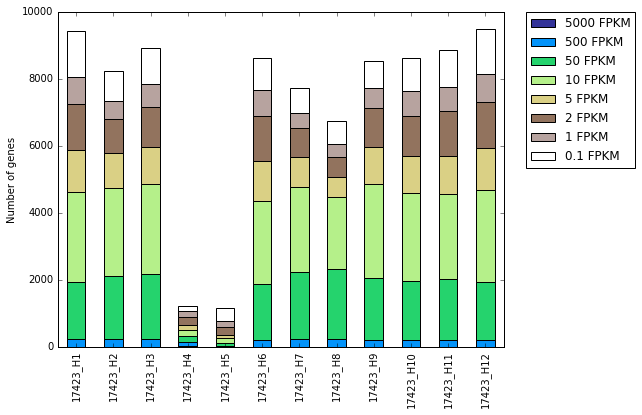

In [19]:
f = fpkm_detection(cegs_protein, 'seaborn-dark-palette', cm=pyplot.cm.terrain)